In [81]:
# pip install pandas

In [82]:
import warnings
import pandas as pd

warnings.filterwarnings('ignore')

In [83]:
# Init des nodes
benchmark = "benchmark_c91f6c5a-0129-11ed-aca3-f9fed7356354_ZRAM"


!ls /home/pi/cluster_shared/benchmark_c91f6c5a-0129-11ed-aca3-f9fed7356354_ZRAM > nodes.txt
#!ls /home/pi/benchmark_cd0c7772-0043-11ed-9b4d-6fe27e66b6e3_2100_6_200 > nodes.txt

nodes = []
with open("nodes.txt", encoding = 'utf-8') as f:
    nodes = f.read().splitlines()
nodes

ls: cannot access '/home/pi/cluster_shared/benchmark_c91f6c5a-0129-11ed-aca3-f9fed7356354_ZRAM': No such file or directory


[]

In [84]:
# Création du dataframe contenant l'ensemble des données.
dataframe = pd.DataFrame(columns = ['Host',
                             'Compression R/U Rate single-thread (MIPS)', 'Decompression R/U Rate single-thread (MIPS)', 
                             'Compression R/U Rate multi-thread (MIPS)', 'Decompression R/U Rate multi-thread (MIPS)', 
                             'Compression R/U Rate hyper-threading (MIPS)', 'Decompression R/U Rate hyper-threading (MIPS)', 
                             'Local write speed 256 (MB/s)', 'Local write speed 512 (MB/s)', 'Local write speed 1024 (MB/s)',
                             'Cached reads speed (MB/s)', 'Buffered disk reads speed (MB/s)',
                             'O_DIRECT cached reads speed (MB/s)', 'O_DIRECT disk reads (MB/s)',
                             'bandwith 8 (Mb/s)', 'bandwith 64 (Mb/s)', 'bandwith 256 (Mb/s)', 'bandwith 512 (Mb/s)', 'bandwith 1024 (Mb/s)',
                             'Blowfish Score', 'CryptoHash Score', 'Fibonacci Score', 'Zlib Score',
                             'N-Queens Score', 'FFT Score', 'Raytracing Score',
                             'Total events CPU', 'Total operations Memory', 'Mean transfer speed Memory (MB/s)', 
                             'Total operations IO per second (op/s)', 'Mean transfer speed IO (MB/s)', 'Total events IO'
                              ])

for node in nodes:
    
    folder = f"/home/pi/cluster_shared/{benchmark}/{node}/"
    #folder = f"/home/pi/{benchmark}/{node}/"
    
    # Création du profil complet d'un node
    
    # Partie Sysbench CPU
    infos = []
    with open(f"{folder}sysbench_cpu.txt", encoding = 'utf-8') as f:
        infos = f.read().splitlines()

    total_events = infos[19].split(" ")[-1]

    sysbench_cpu_profile = [total_events]
#     print(sysbench_cpu_profile)
    
    
    
    # Partie Sysbench Mémoire
    infos = []
    with open(f"{folder}sysbench_memory.txt", encoding = 'utf-8') as f:
        infos = f.read().splitlines()

    total_operations = infos[18].split(" ")[-4]
    transfer_speed = infos[20].split(" ")[-2].strip('(')
    
    sysbench_memory_profile = [total_operations, transfer_speed]
#     print(sysbench_memory_profile)
    
    
    
    # Partie Sysbench FileIO
    infos = []
    with open(f"{folder}sysbench_fileio.txt", encoding = 'utf-8') as f:
        infos = f.read().splitlines()

    total_operations = float(infos[25].split(" ")[-1]) + float(infos[26].split(" ")[-1]) + float(infos[27].split(" ")[-1])
    mean_transfer_speed = (float(infos[30].split(" ")[-1]) + float(infos[31].split(" ")[-1])) / 2
    total_events = infos[35].split(" ")[-1]
    
    sysbench_IO_profile = [total_operations, mean_transfer_speed, total_events]
#     print(sysbench_IO_profile)
    
    
    
    # Partie 7Zip compression
    infos = []
    with open(f"{folder}7z.txt", encoding = 'utf-8') as f:
        infos = f.read().splitlines()

    compressiong_rate_st = [ele for ele in [x.strip(' ') for x in infos[62].split(" ")] if ele.strip()][2]
    decompression_rate_st = [ele for ele in [x.strip(' ') for x in infos[62].split(" ")] if ele.strip()][3]
    compressiong_rate_mt = [ele for ele in [x.strip(' ') for x in infos[119].split(" ")] if ele.strip()][2]
    decompression_rate_mt = [ele for ele in [x.strip(' ') for x in infos[119].split(" ")] if ele.strip()][3]
    compressiong_rate_ht = [ele for ele in [x.strip(' ') for x in infos[176].split(" ")] if ele.strip()][2]
    decompression_rate_ht = [ele for ele in [x.strip(' ') for x in infos[176].split(" ")] if ele.strip()][3]

    seven_profile = [compressiong_rate_st, decompression_rate_st, 
                    compressiong_rate_mt, decompression_rate_mt,
                    compressiong_rate_ht, decompression_rate_ht]
    # print(seven_profile)
    
    
    
    # Partie hardinfo
    infos = []
    with open(f"{folder}hardinfo.txt", encoding = 'utf-8') as f:
        infos = f.read().splitlines()

    blowfish = infos[1].split(";")[2][8:]
    cryptohash = infos[3].split(";")[2][8:]
    fibonacci = infos[5].split(";")[2][8:]
    nqueens = infos[7].split(";")[2][8:]
    zlib = infos[9].split(";")[2][8:]
    fft = infos[11].split(";")[2][8:]
    raytracing = infos[13].split(";")[2][8:]

    hardinfo_profile = [blowfish, cryptohash, fibonacci, nqueens, 
                      zlib, fft, raytracing]
#     print(hardinfo_profile)
    
    
    
    # Partie DD
    infos = []
    with open(f"{folder}dd.txt", encoding = 'utf-8') as f:
        infos = f.read().splitlines()

    local_256_speed = infos[2].split(",")[-1][1:-5]
    local_512_speed = infos[5].split(",")[-1][1:-5]
    local_1024_speed = infos[8].split(",")[-1][1:-5]    


    dd_profile = [local_256_speed, local_512_speed, local_1024_speed]
#     print(dd_profile)

    
    
    # Partie hdparm
    infos = []
    with open(f"{folder}hdparm.txt", encoding = 'utf-8') as f:
        infos = f.read().splitlines()

    cached_read_speed = infos[2].split(" ")[-2]
    buffered_read_speed = infos[3].split(" ")[-2]
    O_DIRECT_cached_read_speed = infos[6].split(" ")[-2]
    O_DIRECT_disk_read_speed = infos[7].split(" ")[-2]

    hdparm_profile = [cached_read_speed, buffered_read_speed, 
                    O_DIRECT_cached_read_speed, O_DIRECT_disk_read_speed]
#     print(hdparm_profile)
    
    
    
    # Partie Iperf
    infos = []
    with open(f"{folder}iperf.txt", encoding = 'utf-8') as f:
        infos = f.read().splitlines()

    bandwith_8 = infos[6].split(" ")[-2]
    bandwith_64 = infos[13].split(" ")[-2]
    bandwith_256 = infos[20].split(" ")[-2]
    bandwith_512 = infos[27].split(" ")[-2]
    bandwith_1024 = infos[34].split(" ")[-2]

    iperf_profile = [bandwith_8, bandwith_64, bandwith_256, bandwith_512, bandwith_1024]
#     print(iperf_profile)

    
    
#     # Partie finale

    complete_profile = [node] + seven_profile + dd_profile + hdparm_profile + iperf_profile + hardinfo_profile + sysbench_cpu_profile + sysbench_memory_profile + sysbench_IO_profile
    
    df_temp = pd.DataFrame([complete_profile],  columns = ['Host',
                             'Compression R/U Rate single-thread (MIPS)', 'Decompression R/U Rate single-thread (MIPS)', 
                             'Compression R/U Rate multi-thread (MIPS)', 'Decompression R/U Rate multi-thread (MIPS)', 
                             'Compression R/U Rate hyper-threading (MIPS)', 'Decompression R/U Rate hyper-threading (MIPS)', 
                             'Local write speed 256 (MB/s)', 'Local write speed 512 (MB/s)', 'Local write speed 1024 (MB/s)',
                             'Cached reads speed (MB/s)', 'Buffered disk reads speed (MB/s)',
                             'O_DIRECT cached reads speed (MB/s)', 'O_DIRECT disk reads (MB/s)',
                             'bandwith 8 (Mb/s)', 'bandwith 64 (Mb/s)', 'bandwith 256 (Mb/s)', 'bandwith 512 (Mb/s)', 'bandwith 1024 (Mb/s)',
                             'Blowfish Score', 'CryptoHash Score', 'Fibonacci Score', 'Zlib Score',
                             'N-Queens Score', 'FFT Score', 'Raytracing Score',
                             'Total events CPU', 'Total operations Memory', 'Mean transfer speed Memory (MB/s)', 
                             'Total operations IO per second (op/s)', 'Mean transfer speed IO (MB/s)', 'Total events IO'
                              ])
    dataframe = pd.concat([dataframe, df_temp], ignore_index=True)

In [85]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [86]:
dataframe

,Host,Compression R/U Rate single-thread (MIPS),Decompression R/U Rate single-thread (MIPS),Compression R/U Rate multi-thread (MIPS),Decompression R/U Rate multi-thread (MIPS),Compression R/U Rate hyper-threading (MIPS),Decompression R/U Rate hyper-threading (MIPS),Local write speed 256 (MB/s),Local write speed 512 (MB/s),Local write speed 1024 (MB/s),Cached reads speed (MB/s),Buffered disk reads speed (MB/s),O_DIRECT cached reads speed (MB/s),O_DIRECT disk reads (MB/s),bandwith 8 (Mb/s),bandwith 64 (Mb/s),bandwith 256 (Mb/s),bandwith 512 (Mb/s),bandwith 1024 (Mb/s),Blowfish Score,CryptoHash Score,Fibonacci Score,Zlib Score,N-Queens Score,FFT Score,Raytracing Score,Total events CPU,Total operations Memory,Mean transfer speed Memory (MB/s),Total operations IO per second (op/s),Mean transfer speed IO (MB/s),Total events IO


In [87]:
# pip install openpyxl

In [138]:
# Export des données vers un fichier Excel

filename = "Classeur1.xlsx"

# écrire le fichier
#dataframe.to_excel(filename, index=False)
df_excel = pd.read_excel(filename)
df_excel

,Compression R/U Rate single-thread (MIPS),Decompression R/U Rate single-thread (MIPS),Compression R/U Rate multi-thread (MIPS),Decompression R/U Rate multi-thread (MIPS),Compression R/U Rate hyper-threading (MIPS),Decompression R/U Rate hyper-threading (MIPS),Local write speed 256 (MB/s),Local write speed 512 (MB/s),Local write speed 1024 (MB/s),Cached reads speed (MB/s),Buffered disk reads speed (MB/s),O_DIRECT cached reads speed (MB/s),O_DIRECT disk reads (MB/s),bandwith 8 (Mb/s),bandwith 64 (Mb/s),bandwith 256 (Mb/s),bandwith 512 (Mb/s),bandwith 1024 (Mb/s),Blowfish Score,CryptoHash Score,Fibonacci Score,Zlib Score,N-Queens Score,FFT Score,Raytracing Score,Total events CPU,Total operations Memory,Mean transfer speed Memory (MB/s),Total operations IO per second (op/s),Mean transfer speed IO (MB/s),Total events IO
0,1793.500,1977.375,1632.875,3544.625,1438.500,5706.500,22.3000,23.4500,24.5125,843.45250,43.05875,37.56000,41.88125,2.86625,2.87500,3.03125,2.88000,2.86500,5.958829,303.894299,1.846821,8.866801,0.402398,4.724742,2.359399,26420.875,8.414016e+07,8213.71250,1275.62250,4.418750,382309.500
1,1889.125,2081.875,1704.750,3687.125,1481.375,5872.750,21.0250,22.3250,24.4500,835.09750,43.28875,38.56875,42.51125,2.86500,2.86000,2.88625,2.87750,2.87500,5.561257,324.967976,1.717105,8.236898,0.401508,5.300535,2.169691,28171.375,8.862055e+07,8651.24000,1226.15000,4.248750,367532.750
2,1590.625,1751.750,1418.625,3057.000,1216.125,4823.750,21.0250,22.9375,24.5625,856.28375,43.26125,38.40625,42.41000,2.85625,2.97750,3.07000,2.89875,2.90000,4.839371,374.099082,1.490679,7.129753,0.436220,5.250318,1.901458,32485.250,1.016741e+08,9929.48625,1234.19375,4.277500,369883.500
3,1587.625,1748.625,1419.125,3056.500,1221.750,4842.875,19.1750,21.9500,23.5875,857.02875,43.25250,38.24375,42.47875,2.97125,3.04375,2.90375,3.00000,2.92000,4.838064,374.251519,1.490681,7.114625,0.464619,5.255875,1.929010,32478.625,1.021984e+08,9977.15625,1159.38500,3.895625,347446.625
4,2045.875,2252.750,1815.750,3903.750,1561.875,6201.250,20.2250,22.1625,23.7875,753.54750,43.24375,38.38125,42.25625,2.92750,2.95000,3.10000,2.96250,2.96875,4.971927,365.395512,1.529520,7.312269,0.424243,5.279793,1.975901,31696.375,9.885599e+07,9650.72500,1187.42000,4.116250,355891.250
5,2087.500,2297.125,1864.000,4017.125,1607.625,6379.625,20.7875,22.3750,24.0750,853.69875,43.26000,38.31750,42.56250,2.96500,2.94000,2.93875,2.95250,2.96250,4.947431,366.037195,1.529503,7.316505,0.429498,5.255234,1.958106,31698.375,9.923645e+07,9687.92000,1161.68625,4.028750,348209.875
6,2100.375,2312.750,1881.250,4062.125,1622.125,6434.625,21.1750,22.6000,24.4000,892.33875,43.25375,38.35000,42.49375,2.86500,2.86250,2.86875,3.01250,2.87500,4.935165,365.679191,1.529605,7.298539,0.451458,5.229380,1.956108,31700.375,9.980631e+07,9748.59875,1184.45500,4.006250,354947.500
7,2045.750,2249.250,1812.500,3895.125,1557.625,6166.875,21.8750,23.2250,24.6250,747.53125,43.27375,38.66000,42.30625,2.88875,2.87250,2.87875,2.87750,3.26000,4.955723,365.767897,1.529505,7.329752,0.421635,5.283256,1.945939,31686.250,9.894691e+07,9659.52625,1293.98250,4.357500,387846.750
8,2037.250,2241.125,1816.125,3909.125,1562.000,6189.875,22.2875,23.4000,24.5250,753.80625,43.09250,37.87500,42.01625,2.85750,2.85250,2.88375,2.85750,2.85875,4.941392,365.254767,1.529742,7.313273,0.453679,5.306114,1.961683,31687.500,9.914049e+07,9678.47125,1255.44750,4.225000,376223.625
9,2041.500,2249.250,1819.125,3916.250,1563.625,6197.000,22.0625,23.1625,23.9375,748.38875,43.07375,37.93125,42.08250,2.89750,2.85000,2.86750,2.88625,3.04000,4.951999,365.579123,1.529468,7.297536,0.458314,5.312168,1.943436,31692.750,9.920949e+07,9685.21750,1256.83500,4.229375,376677.000


In [139]:
df_mean = pd.DataFrame([df_excel.mean()])
df_mean

,Compression R/U Rate single-thread (MIPS),Decompression R/U Rate single-thread (MIPS),Compression R/U Rate multi-thread (MIPS),Decompression R/U Rate multi-thread (MIPS),Compression R/U Rate hyper-threading (MIPS),Decompression R/U Rate hyper-threading (MIPS),Local write speed 256 (MB/s),Local write speed 512 (MB/s),Local write speed 1024 (MB/s),Cached reads speed (MB/s),Buffered disk reads speed (MB/s),O_DIRECT cached reads speed (MB/s),O_DIRECT disk reads (MB/s),bandwith 8 (Mb/s),bandwith 64 (Mb/s),bandwith 256 (Mb/s),bandwith 512 (Mb/s),bandwith 1024 (Mb/s),Blowfish Score,CryptoHash Score,Fibonacci Score,Zlib Score,N-Queens Score,FFT Score,Raytracing Score,Total events CPU,Total operations Memory,Mean transfer speed Memory (MB/s),Total operations IO per second (op/s),Mean transfer speed IO (MB/s),Total events IO
0,1921.9125,2116.1875,1718.4125,3704.875,1483.2625,5881.5125,21.19375,22.75875,24.24625,814.117375,43.205875,38.229375,42.299875,2.896,2.908375,2.942875,2.9205,2.9525,5.090116,357.092656,1.572263,7.521595,0.434357,5.219741,2.010073,30971.775,97182884.6,9488.205375,1223.51775,4.180375,366696.8375


In [140]:
# Export des données vers un fichier Excel

#filename = "benchmark_stats_idle_2100_6_750_ZRAM_mean.xlsx"

# écrire le fichier
#df_mean.to_excel(filename, index=False)

# Partie Graphe

In [141]:
# pip install seaborn

## ca c'est bien pour comparer les nodes sur l'ensemble des attributs 

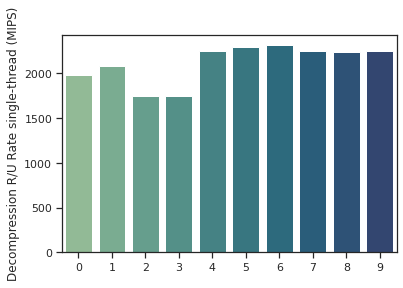

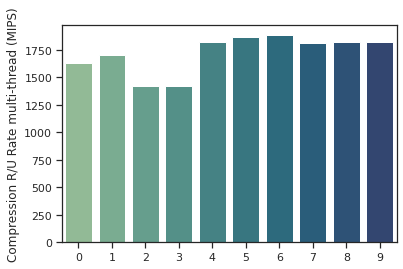

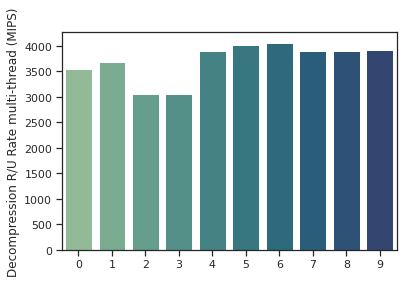

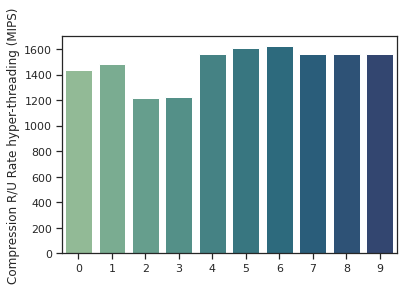

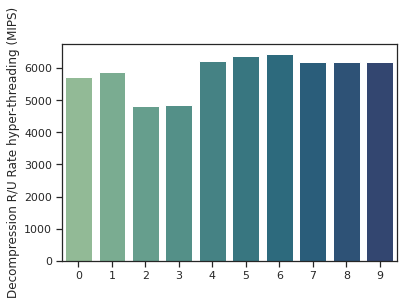

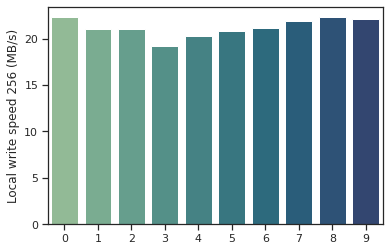

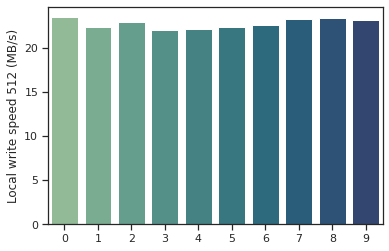

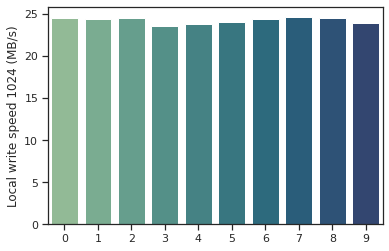

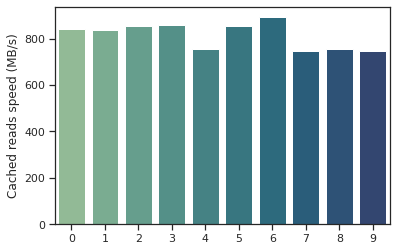

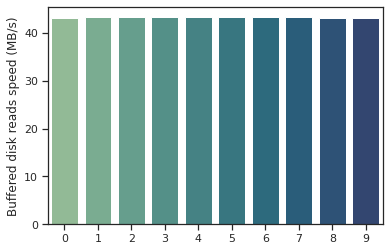

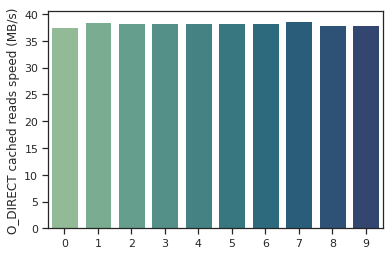

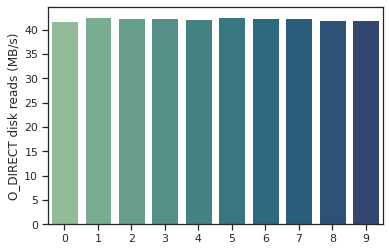

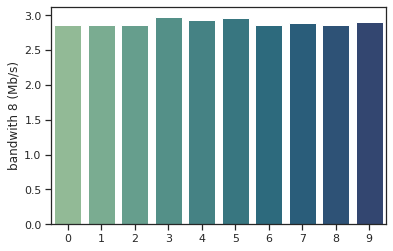

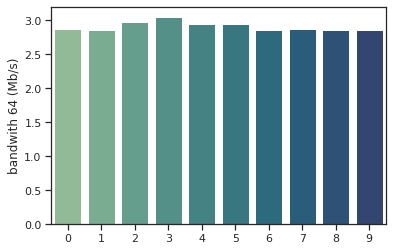

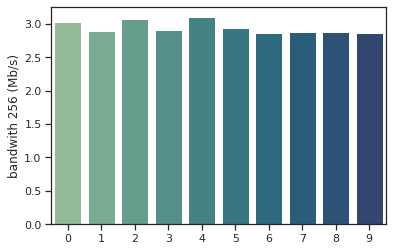

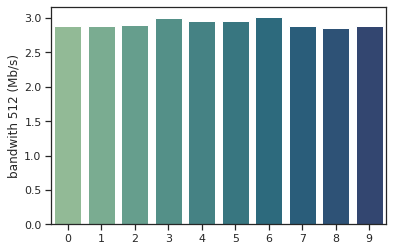

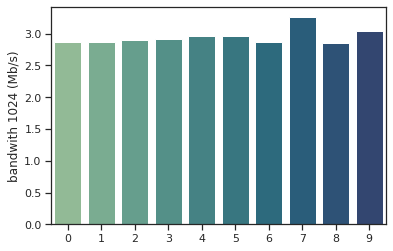

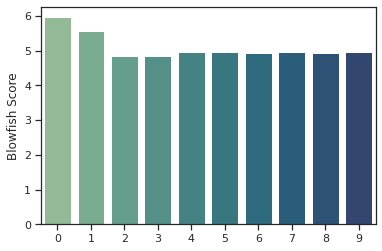

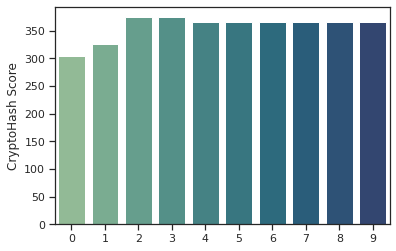

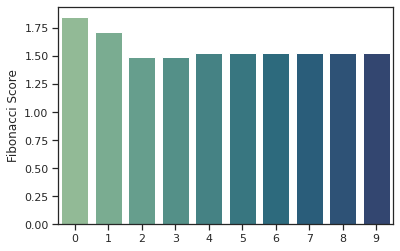

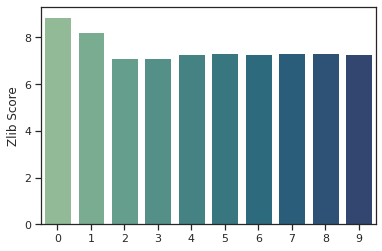

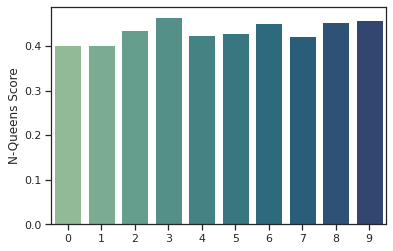

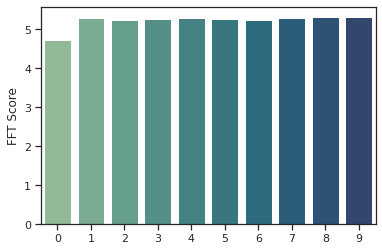

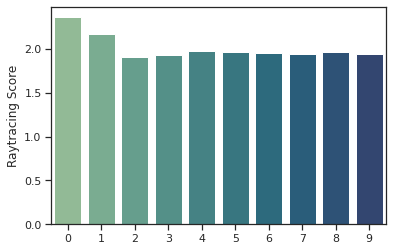

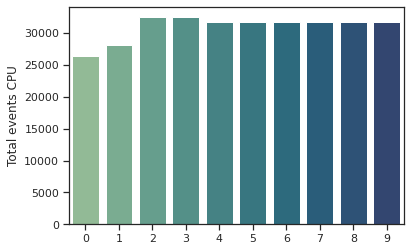

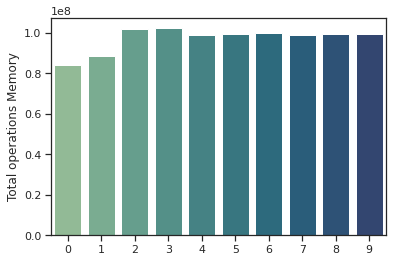

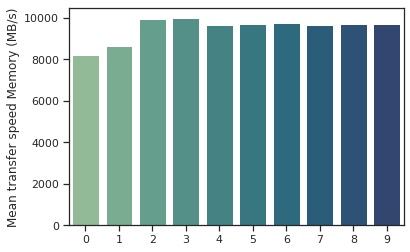

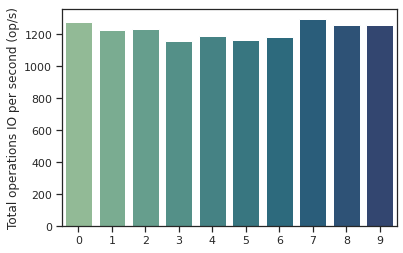

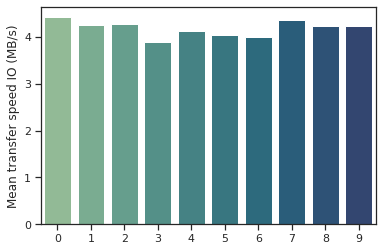

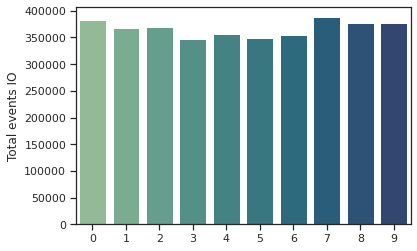

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

for i, column in enumerate(df_excel.columns[1:]):
    plt.figure(i)
    sns.barplot(x=df_excel.index, y=df_excel[column], palette="crest")

## Remise en %

In [143]:
df_perc = df_excel.copy(deep=True)


if 'Host' in df_perc.columns: 
     df_perc.pop('Host')

for i in df_perc.index:
    if i != 0:
        for x, column in enumerate(df_perc.columns):
            if df_perc.at[i,column] != df_perc.at[0,column] :
                df_perc.at[i,column] = df_perc.at[i,column] * 100 / df_perc.at[0,column]
            else :
                df_perc.at[i,column] = 100.0
       
for column in df_perc.columns:
    df_perc.at[0,column] = 100
    
df_perc

,Compression R/U Rate single-thread (MIPS),Decompression R/U Rate single-thread (MIPS),Compression R/U Rate multi-thread (MIPS),Decompression R/U Rate multi-thread (MIPS),Compression R/U Rate hyper-threading (MIPS),Decompression R/U Rate hyper-threading (MIPS),Local write speed 256 (MB/s),Local write speed 512 (MB/s),Local write speed 1024 (MB/s),Cached reads speed (MB/s),Buffered disk reads speed (MB/s),O_DIRECT cached reads speed (MB/s),O_DIRECT disk reads (MB/s),bandwith 8 (Mb/s),bandwith 64 (Mb/s),bandwith 256 (Mb/s),bandwith 512 (Mb/s),bandwith 1024 (Mb/s),Blowfish Score,CryptoHash Score,Fibonacci Score,Zlib Score,N-Queens Score,FFT Score,Raytracing Score,Total events CPU,Total operations Memory,Mean transfer speed Memory (MB/s),Total operations IO per second (op/s),Mean transfer speed IO (MB/s),Total events IO
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,105.331754,105.284784,104.401745,104.020171,102.980535,102.913344,94.282511,95.202559,99.745028,99.009429,100.534154,102.685703,101.504253,99.956389,99.478261,95.216495,99.913194,100.349040,93.328018,106.934542,92.976268,92.895934,99.779043,112.186760,91.959508,106.625443,105.324911,105.326793,96.121697,96.152758,96.134872
2,88.688319,88.589671,86.878971,86.243256,84.541189,84.530798,94.282511,97.814499,100.203978,101.521277,100.470288,102.253062,101.262498,99.651112,103.565217,101.278351,100.651042,101.221640,81.213455,123.101711,80.715942,80.409530,108.405215,111.123898,80.590795,122.952968,120.839022,120.889138,96.752272,96.803395,96.749754
3,88.521048,88.431633,86.909592,86.229150,84.932221,84.865942,85.986547,93.603412,96.226415,101.609605,100.449967,101.820421,101.426653,103.663323,105.869565,95.793814,104.166667,101.919721,81.191525,123.151872,80.716078,80.238909,115.462789,111.241524,81.758539,122.927893,121.462033,121.469509,90.887782,88.161245,90.880981
4,114.071648,113.926291,111.199571,110.131537,108.576642,108.669938,90.695067,94.509595,97.042325,89.340834,100.429646,102.186502,100.895389,102.136939,102.608696,102.268041,102.864583,103.621291,83.437982,120.237699,82.819090,82.467942,105.428960,111.747744,83.745969,119.967166,117.489656,117.495286,93.085533,93.154173,93.089826
5,116.392529,116.170428,114.154482,113.330042,111.757039,111.795759,93.217489,95.415778,98.215196,101.214799,100.467385,102.016773,101.626623,103.445268,102.260870,96.948454,102.517361,103.403141,83.026896,120.448852,82.818150,82.515717,106.734821,111.227951,82.991761,119.974736,117.941837,117.948126,91.068184,91.173975,91.080623
6,117.110399,116.960617,115.210901,114.599570,112.765033,112.759572,94.955157,96.375267,99.541050,105.795970,100.452870,102.103301,101.462468,99.956389,99.565217,94.639175,104.600694,100.349040,82.821053,120.331047,82.823700,82.313096,112.192111,110.680758,82.907042,119.982306,118.619105,118.686876,92.853097,90.664781,92.842971
7,114.064678,113.749289,111.000536,109.888211,108.281196,108.067555,98.094170,99.040512,100.458950,88.627546,100.499318,102.928647,101.014774,100.784998,99.913043,94.969072,99.913194,113.787086,83.166045,120.360237,82.818265,82.665120,104.780783,111.821047,82.476069,119.928844,117.597719,117.602439,101.439297,98.613861,101.448368
8,113.590744,113.338391,111.222537,110.283175,108.585332,108.470604,99.943946,99.786780,100.050994,89.371512,100.078381,100.838658,100.322340,99.694723,99.217391,95.134021,99.218750,99.781850,82.925551,120.191385,82.831077,82.479272,112.744053,112.304833,83.143368,119.933575,117.827786,117.833090,98.418419,95.615276,98.408129
9,113.827711,113.749289,111.406262,110.484184,108.698297,108.595461,98.934978,98.773987,97.654258,88.729211,100.034836,100.988419,100.480525,101.090275,99.130435,94.597938,100.217014,106.108202,8

In [144]:
#Export des données vers un fichier Excel

filename = "Classeur1_pourc.xlsx"

# écrire le fichier
df_perc.to_excel(filename, index=False)
df_excel = pd.read_excel(filename)
df_excel

,Compression R/U Rate single-thread (MIPS),Decompression R/U Rate single-thread (MIPS),Compression R/U Rate multi-thread (MIPS),Decompression R/U Rate multi-thread (MIPS),Compression R/U Rate hyper-threading (MIPS),Decompression R/U Rate hyper-threading (MIPS),Local write speed 256 (MB/s),Local write speed 512 (MB/s),Local write speed 1024 (MB/s),Cached reads speed (MB/s),Buffered disk reads speed (MB/s),O_DIRECT cached reads speed (MB/s),O_DIRECT disk reads (MB/s),bandwith 8 (Mb/s),bandwith 64 (Mb/s),bandwith 256 (Mb/s),bandwith 512 (Mb/s),bandwith 1024 (Mb/s),Blowfish Score,CryptoHash Score,Fibonacci Score,Zlib Score,N-Queens Score,FFT Score,Raytracing Score,Total events CPU,Total operations Memory,Mean transfer speed Memory (MB/s),Total operations IO per second (op/s),Mean transfer speed IO (MB/s),Total events IO
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,105.331754,105.284784,104.401745,104.020171,102.980535,102.913344,94.282511,95.202559,99.745028,99.009429,100.534154,102.685703,101.504253,99.956389,99.478261,95.216495,99.913194,100.349040,93.328018,106.934542,92.976268,92.895934,99.779043,112.186760,91.959508,106.625443,105.324911,105.326793,96.121697,96.152758,96.134872
2,88.688319,88.589671,86.878971,86.243256,84.541189,84.530798,94.282511,97.814499,100.203978,101.521277,100.470288,102.253062,101.262498,99.651112,103.565217,101.278351,100.651042,101.221640,81.213455,123.101711,80.715942,80.409530,108.405215,111.123898,80.590795,122.952968,120.839022,120.889138,96.752272,96.803395,96.749754
3,88.521048,88.431633,86.909592,86.229150,84.932221,84.865942,85.986547,93.603412,96.226415,101.609605,100.449967,101.820421,101.426653,103.663323,105.869565,95.793814,104.166667,101.919721,81.191525,123.151872,80.716078,80.238909,115.462789,111.241524,81.758539,122.927893,121.462033,121.469509,90.887782,88.161245,90.880981
4,114.071648,113.926291,111.199571,110.131537,108.576642,108.669938,90.695067,94.509595,97.042325,89.340834,100.429646,102.186502,100.895389,102.136939,102.608696,102.268041,102.864583,103.621291,83.437982,120.237699,82.819090,82.467942,105.428960,111.747744,83.745969,119.967166,117.489656,117.495286,93.085533,93.154173,93.089826
5,116.392529,116.170428,114.154482,113.330042,111.757039,111.795759,93.217489,95.415778,98.215196,101.214799,100.467385,102.016773,101.626623,103.445268,102.260870,96.948454,102.517361,103.403141,83.026896,120.448852,82.818150,82.515717,106.734821,111.227951,82.991761,119.974736,117.941837,117.948126,91.068184,91.173975,91.080623
6,117.110399,116.960617,115.210901,114.599570,112.765033,112.759572,94.955157,96.375267,99.541050,105.795970,100.452870,102.103301,101.462468,99.956389,99.565217,94.639175,104.600694,100.349040,82.821053,120.331047,82.823700,82.313096,112.192111,110.680758,82.907042,119.982306,118.619105,118.686876,92.853097,90.664781,92.842971
7,114.064678,113.749289,111.000536,109.888211,108.281196,108.067555,98.094170,99.040512,100.458950,88.627546,100.499318,102.928647,101.014774,100.784998,99.913043,94.969072,99.913194,113.787086,83.166045,120.360237,82.818265,82.665120,104.780783,111.821047,82.476069,119.928844,117.597719,117.602439,101.439297,98.613861,101.448368
8,113.590744,113.338391,111.222537,110.283175,108.585332,108.470604,99.943946,99.786780,100.050994,89.371512,100.078381,100.838658,100.322340,99.694723,99.217391,95.134021,99.218750,99.781850,82.925551,120.191385,82.831077,82.479272,112.744053,112.304833,83.143368,119.933575,117.827786,117.833090,98.418419,95.615276,98.408129
9,113.827711,113.749289,111.406262,110.484184,108.698297,108.595461,98.934978,98.773987,97.654258,88.729211,100.034836,100.988419,100.480525,101.090275,99.130435,94.597938,100.217014,106.108202,8

[Text(0.5, 0, 'Percentage')]

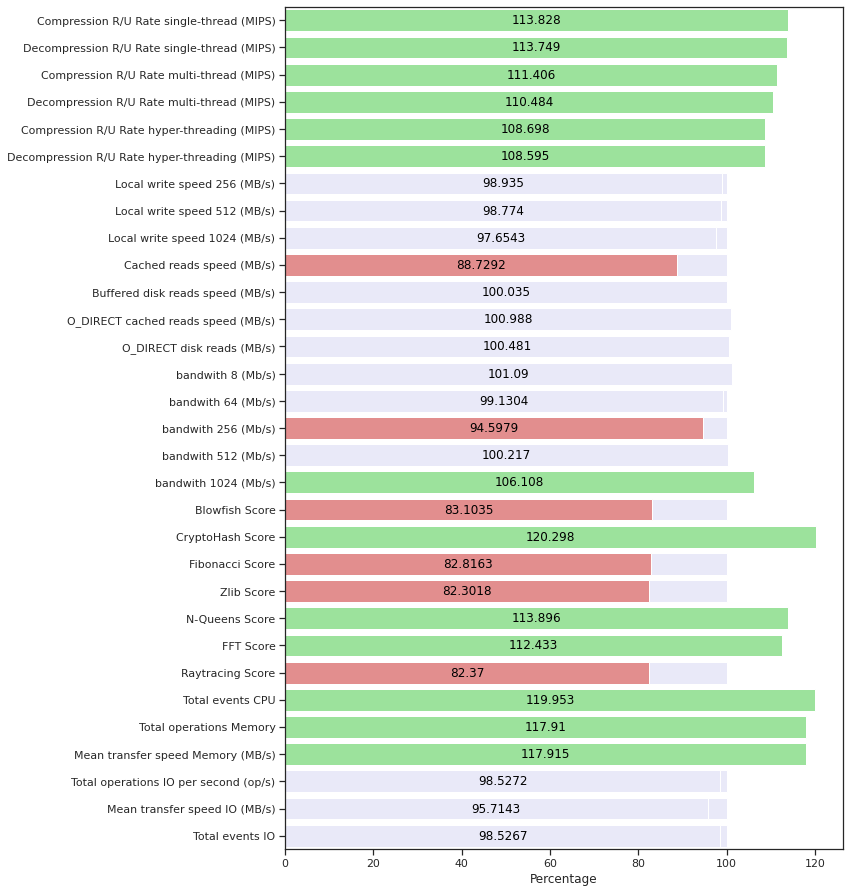

In [116]:
target_id = 3

pal = []
for item in df_perc.iloc[target_id]:
    if item >= 105:
        pal.append('lightgreen')
    elif item <= 95:
        pal.append('lightcoral')
    else:
        pal.append('lavender')
customPalette = sns.set_palette(pal)


graph_size = df_perc.iloc[target_id].count()
f, ax = plt.subplots(figsize=(10, graph_size/2))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=df_perc.iloc[0], y=df_perc.columns, label="idle", color="lavender")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=df_perc.iloc[target_id], y=df_perc.columns, label="optimised", palette=customPalette)
ax.bar_label(ax.containers[1], size=12, color='black', label_type='center')
ax.set(xlabel='Percentage')

## Ne garder que les dimensions positifs et négatifs

In [117]:
df_perc2 = df_perc
df_perc2

,Compression R/U Rate single-thread (MIPS),Decompression R/U Rate single-thread (MIPS),Compression R/U Rate multi-thread (MIPS),Decompression R/U Rate multi-thread (MIPS),Compression R/U Rate hyper-threading (MIPS),Decompression R/U Rate hyper-threading (MIPS),Local write speed 256 (MB/s),Local write speed 512 (MB/s),Local write speed 1024 (MB/s),Cached reads speed (MB/s),Buffered disk reads speed (MB/s),O_DIRECT cached reads speed (MB/s),O_DIRECT disk reads (MB/s),bandwith 8 (Mb/s),bandwith 64 (Mb/s),bandwith 256 (Mb/s),bandwith 512 (Mb/s),bandwith 1024 (Mb/s),Blowfish Score,CryptoHash Score,Fibonacci Score,Zlib Score,N-Queens Score,FFT Score,Raytracing Score,Total events CPU,Total operations Memory,Mean transfer speed Memory (MB/s),Total operations IO per second (op/s),Mean transfer speed IO (MB/s),Total events IO
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,114.064678,113.749289,111.000536,109.888211,108.281196,108.067555,98.094170,99.040512,100.458950,88.627546,100.499318,102.928647,101.014774,100.784998,99.913043,94.969072,99.913194,113.787086,83.166045,120.360237,82.818265,82.665120,104.780783,111.821047,82.476069,119.928844,117.597719,117.602439,101.439297,98.613861,101.448368
2,113.590744,113.338391,111.222537,110.283175,108.585332,108.470604,99.943946,99.786780,100.050994,89.371512,100.078381,100.838658,100.322340,99.694723,99.217391,95.134021,99.218750,99.781850,82.925551,120.191385,82.831077,82.479272,112.744053,112.304833,83.143368,119.933575,117.827786,117.833090,98.418419,95.615276,98.408129
3,113.827711,113.749289,111.406262,110.484184,108.698297,108.595461,98.934978,98.773987,97.654258,88.729211,100.034836,100.988419,100.480525,101.090275,99.130435,94.597938,100.217014,106.108202,83.103549,120.298118,82.816275,82.301784,113.895837,112.432972,82.369961,119.953446,117.909795,117.915224,98.527190,95.714286,98.526717


[Text(0.5, 0, 'Percentage')]

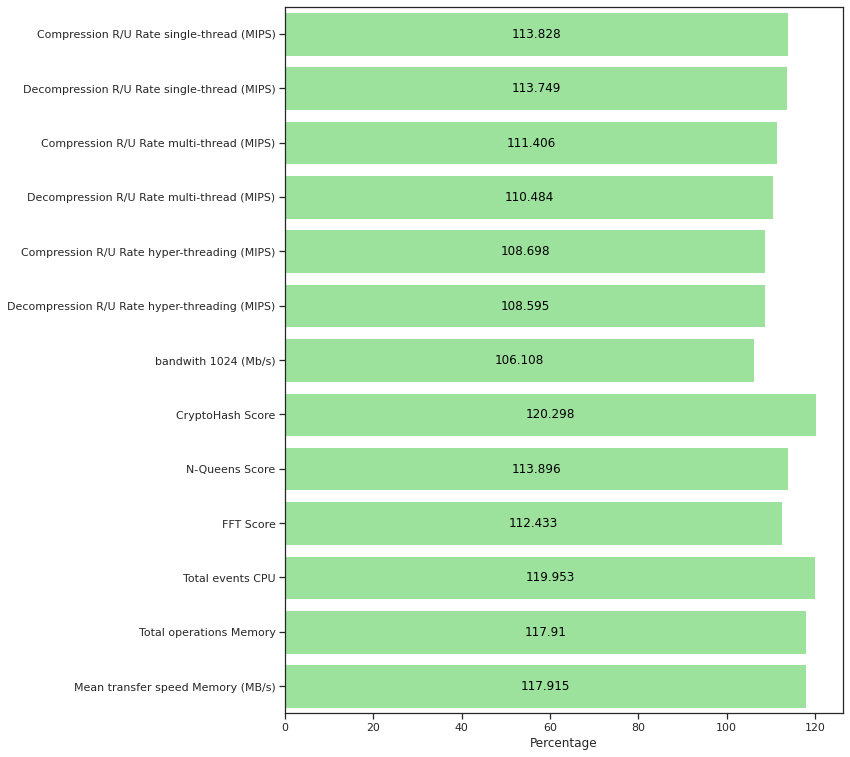

In [118]:
threshold = 105

pal = []
for item in df_perc.iloc[target_id][df_perc.iloc[target_id] > threshold]:
    if item >= 105:
        pal.append('lightgreen')
    elif item <= 95:
        pal.append('lightcoral')
    else:
        pal.append('lavender')
customPalette = sns.set_palette(pal)

graph_size = df_perc.iloc[target_id][df_perc.iloc[target_id] > threshold].count()
f, ax = plt.subplots(figsize=(10, graph_size))
    
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=df_perc.iloc[0][df_perc.iloc[target_id] > threshold], y=df_perc.columns[df_perc.iloc[target_id] > threshold], label="idle", color="lavender")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=df_perc.iloc[target_id][df_perc.iloc[target_id] > threshold], y=df_perc.columns[df_perc.iloc[target_id] > threshold], label="optimised", palette=customPalette)
ax.bar_label(ax.containers[1], size=12, color='black', label_type='center')
ax.set(xlabel='Percentage')

[Text(0.5, 0, 'Percentage')]

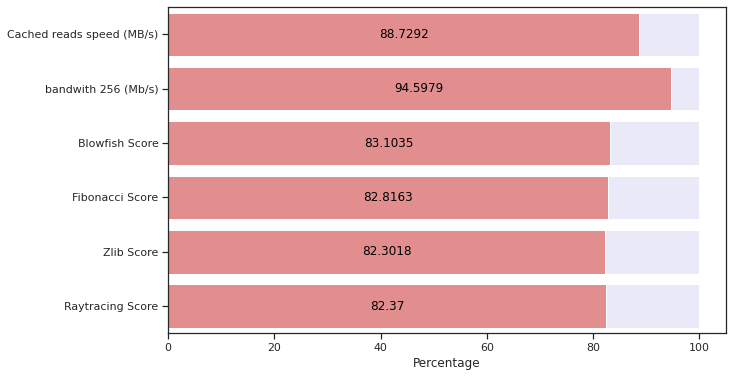

In [119]:
threshold = 95

pal = []
for item in df_perc.iloc[target_id][df_perc.iloc[target_id] < threshold]:
    if item >= 105:
        pal.append('lightgreen')
    elif item < 95:
        pal.append('lightcoral')
    else:
        pal.append('lavender')
customPalette = sns.set_palette(pal)

graph_size = df_perc.iloc[target_id][df_perc.iloc[target_id] < threshold].count()
f, ax = plt.subplots(figsize=(10, graph_size))
    
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=df_perc.iloc[0][df_perc.iloc[target_id] < threshold], y=df_perc.columns[df_perc.iloc[target_id] < threshold], label="idle", color="lavender")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=df_perc.iloc[target_id][df_perc.iloc[target_id] < threshold], y=df_perc.columns[df_perc.iloc[target_id] < threshold], label="optimised", palette=customPalette)
ax.bar_label(ax.containers[1], size=12, color='black', label_type='center')
ax.set(xlabel='Percentage')

## Graphe de score en plot

[(2500.0, 4000.0)]

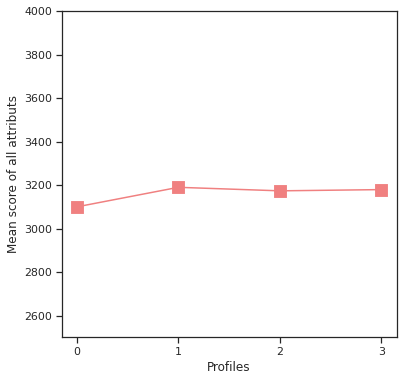

In [120]:
f, ax = plt.subplots(figsize=(6, 6))
sns.set_theme(style="ticks")
sns.scatterplot(data=df_perc2, x=df_perc2.index, y=df_perc2.sum(axis=1), marker='s', s=200)
sns.lineplot(data=df_perc2, x=df_perc2.index, y=df_perc2.sum(axis=1))
ax.set(xlabel='Profiles', ylabel='Mean score of all attributs')
ax.set_xticks(range(len(df_perc2.index)))
ax.set_xticklabels(range(len(df_perc2.index)))
ax.set(ylim=(2500, 4000))

## Calc du score métrique

In [121]:
df_perc

,Compression R/U Rate single-thread (MIPS),Decompression R/U Rate single-thread (MIPS),Compression R/U Rate multi-thread (MIPS),Decompression R/U Rate multi-thread (MIPS),Compression R/U Rate hyper-threading (MIPS),Decompression R/U Rate hyper-threading (MIPS),Local write speed 256 (MB/s),Local write speed 512 (MB/s),Local write speed 1024 (MB/s),Cached reads speed (MB/s),Buffered disk reads speed (MB/s),O_DIRECT cached reads speed (MB/s),O_DIRECT disk reads (MB/s),bandwith 8 (Mb/s),bandwith 64 (Mb/s),bandwith 256 (Mb/s),bandwith 512 (Mb/s),bandwith 1024 (Mb/s),Blowfish Score,CryptoHash Score,Fibonacci Score,Zlib Score,N-Queens Score,FFT Score,Raytracing Score,Total events CPU,Total operations Memory,Mean transfer speed Memory (MB/s),Total operations IO per second (op/s),Mean transfer speed IO (MB/s),Total events IO
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,114.064678,113.749289,111.000536,109.888211,108.281196,108.067555,98.094170,99.040512,100.458950,88.627546,100.499318,102.928647,101.014774,100.784998,99.913043,94.969072,99.913194,113.787086,83.166045,120.360237,82.818265,82.665120,104.780783,111.821047,82.476069,119.928844,117.597719,117.602439,101.439297,98.613861,101.448368
2,113.590744,113.338391,111.222537,110.283175,108.585332,108.470604,99.943946,99.786780,100.050994,89.371512,100.078381,100.838658,100.322340,99.694723,99.217391,95.134021,99.218750,99.781850,82.925551,120.191385,82.831077,82.479272,112.744053,112.304833,83.143368,119.933575,117.827786,117.833090,98.418419,95.615276,98.408129
3,113.827711,113.749289,111.406262,110.484184,108.698297,108.595461,98.934978,98.773987,97.654258,88.729211,100.034836,100.988419,100.480525,101.090275,99.130435,94.597938,100.217014,106.108202,83.103549,120.298118,82.816275,82.301784,113.895837,112.432972,82.369961,119.953446,117.909795,117.915224,98.527190,95.714286,98.526717


In [122]:
df_cpu = df_perc.copy(deep=True)
df_gpu = df_perc.copy(deep=True)
df_memory = df_perc.copy(deep=True)
df_storage = df_perc.copy(deep=True)
df_network = df_perc.copy(deep=True)

df_cpu = df_cpu[['Compression R/U Rate single-thread (MIPS)', 'Decompression R/U Rate single-thread (MIPS)', 
                     'Compression R/U Rate multi-thread (MIPS)', 'Decompression R/U Rate multi-thread (MIPS)',
                     'Compression R/U Rate hyper-threading (MIPS)', 'Decompression R/U Rate hyper-threading (MIPS)',
                     'Blowfish Score', 'CryptoHash Score', 'Fibonacci Score', 'Zlib Score','N-Queens Score', 
                     'FFT Score', 'Raytracing Score', 'Total events CPU']]
df_memory = df_memory[['Total operations Memory', 'Mean transfer speed Memory (MB/s)']]
df_storage = df_storage[['Local write speed 256 (MB/s)', 'Local write speed 512 (MB/s)', 'Local write speed 1024 (MB/s)',
                           'Cached reads speed (MB/s)', 'Buffered disk reads speed (MB/s)',
                           'O_DIRECT cached reads speed (MB/s)', 'O_DIRECT disk reads (MB/s)',
                           'Total operations IO per second (op/s)', 'Mean transfer speed IO (MB/s)', 'Total events IO']]
df_network = df_network[['bandwith 8 (Mb/s)', 'bandwith 64 (Mb/s)', 'bandwith 256 (Mb/s)', 
                         'bandwith 512 (Mb/s)', 'bandwith 1024 (Mb/s)']]
df_gpu = df_gpu[['Compression R/U Rate single-thread (MIPS)', 'Decompression R/U Rate single-thread (MIPS)', 
                     'Compression R/U Rate multi-thread (MIPS)', 'Decompression R/U Rate multi-thread (MIPS)',
                     'Compression R/U Rate hyper-threading (MIPS)', 'Decompression R/U Rate hyper-threading (MIPS)',
                     'CryptoHash Score','N-Queens Score', 
                     'FFT Score', 'Total events CPU']]

### CPU SCORE without GPU

[Text(0.5, 0, 'Percentage')]

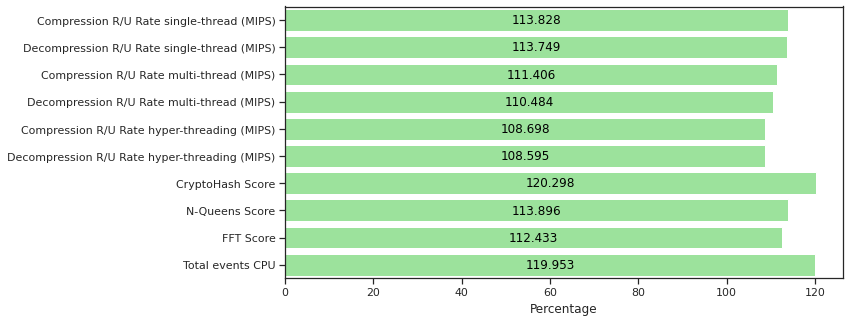

In [123]:
pal = []
target = df_gpu
for item in target.iloc[target_id]:
    if item >= 105:
        pal.append('lightgreen')
    elif item <= 95:
        pal.append('lightcoral')
    else:
        pal.append('lavender')
customPalette = sns.set_palette(pal)


graph_size = target.iloc[target_id].count()
f, ax = plt.subplots(figsize=(10, graph_size/2))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=target.iloc[0], y=target.columns, label="idle", color="lavender")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=target.iloc[target_id], y=target.columns, label="optimised", palette=customPalette)
ax.bar_label(ax.containers[1], size=12, color='black', label_type='center')
ax.set(xlabel='Percentage')

In [124]:
sum_gpu = df_gpu.sum(axis = 1)
print(f"score : {sum_gpu[target_id]}")
sum_gpu_perc = sum_gpu / 1000 * 100
print(f"percentage : {sum_gpu_perc[target_id]}")

score : 1133.341577066711
percentage : 113.33415770667108


### CPU SCORE

[Text(0.5, 0, 'Percentage')]

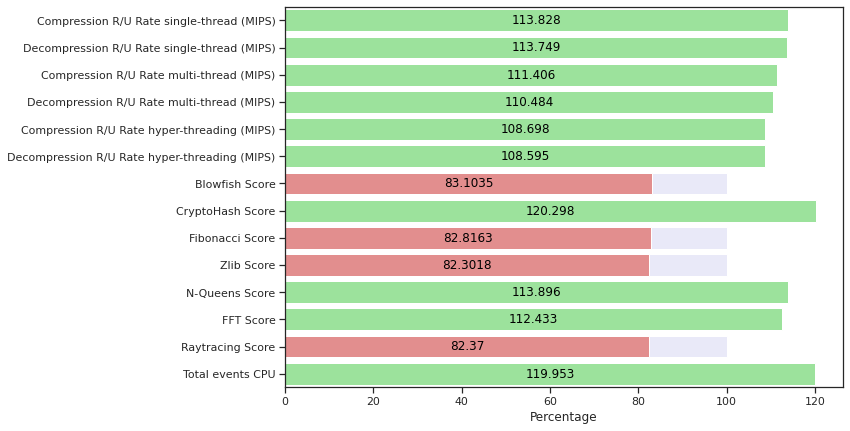

In [125]:
pal = []
target = df_cpu
for item in target.iloc[target_id]:
    if item >= 105:
        pal.append('lightgreen')
    elif item <= 95:
        pal.append('lightcoral')
    else:
        pal.append('lavender')
customPalette = sns.set_palette(pal)


graph_size = target.iloc[target_id].count()
f, ax = plt.subplots(figsize=(10, graph_size/2))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=target.iloc[0], y=target.columns, label="idle", color="lavender")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=target.iloc[target_id], y=target.columns, label="optimised", palette=customPalette)
ax.bar_label(ax.containers[1], size=12, color='black', label_type='center')
ax.set(xlabel='Percentage')

In [126]:
sum_cpu = df_cpu.sum(axis = 1)
print(f"score : {sum_cpu[target_id]}")
sum_cpu_perc = sum_cpu / 1400 * 100
print(f"percentage : {sum_cpu_perc[target_id]}")

score : 1463.93314629601
percentage : 104.56665330685786


### Memory Score

[Text(0.5, 0, 'Percentage')]

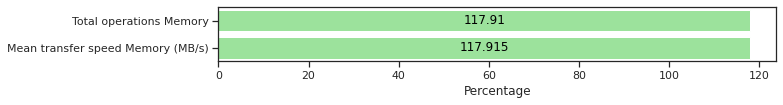

In [127]:
pal = []
target = df_memory
for item in target.iloc[target_id]:
    if item >= 105:
        pal.append('lightgreen')
    elif item <= 95:
        pal.append('lightcoral')
    else:
        pal.append('lavender')
customPalette = sns.set_palette(pal)


graph_size = target.iloc[target_id].count()
f, ax = plt.subplots(figsize=(10, graph_size/2))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=target.iloc[0], y=target.columns, label="idle", color="lavender")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=target.iloc[target_id], y=target.columns, label="optimised", palette=customPalette)
ax.bar_label(ax.containers[1], size=12, color='black', label_type='center')
ax.set(xlabel='Percentage')

In [128]:
sum_memory = df_memory.sum(axis = 1)
print(f"score : {sum_memory[target_id]}")
sum_memory_perc = sum_memory / 200 * 100
print(f"percentage : {sum_memory_perc[target_id]}")

score : 235.82501873953362
percentage : 117.91250936976681


### Storage Score

[Text(0.5, 0, 'Percentage')]

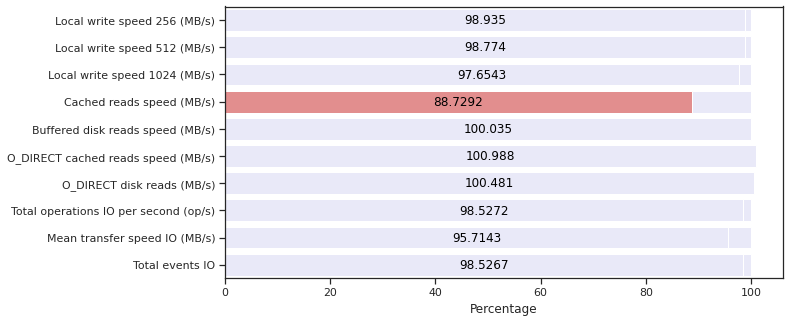

In [129]:
pal = []
target = df_storage
for item in target.iloc[target_id]:
    if item >= 105:
        pal.append('lightgreen')
    elif item <= 95:
        pal.append('lightcoral')
    else:
        pal.append('lavender')
customPalette = sns.set_palette(pal)


graph_size = target.iloc[target_id].count()
f, ax = plt.subplots(figsize=(10, graph_size/2))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=target.iloc[0], y=target.columns, label="idle", color="lavender")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=target.iloc[target_id], y=target.columns, label="optimised", palette=customPalette)
ax.bar_label(ax.containers[1], size=12, color='black', label_type='center')
ax.set(xlabel='Percentage')

In [130]:
sum_storage = df_storage.sum(axis = 1)
print(f"score : {sum_storage[target_id]}")
sum_storage_perc = sum_storage / 1000 * 100
print(f"percentage : {sum_storage_perc[target_id]}")

score : 978.3644065639011
percentage : 97.83644065639011


### Network Score

[Text(0.5, 0, 'Percentage')]

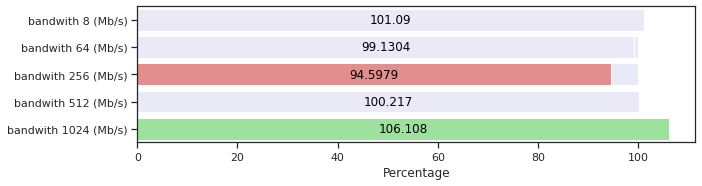

In [131]:
pal = []
target = df_network
for item in target.iloc[target_id]:
    if item >= 105:
        pal.append('lightgreen')
    elif item <= 95:
        pal.append('lightcoral')
    else:
        pal.append('lavender')
customPalette = sns.set_palette(pal)


graph_size = target.iloc[target_id].count()
f, ax = plt.subplots(figsize=(10, graph_size/2))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=target.iloc[0], y=target.columns, label="idle", color="lavender")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x=target.iloc[target_id], y=target.columns, label="optimised", palette=customPalette)
ax.bar_label(ax.containers[1], size=12, color='black', label_type='center')
ax.set(xlabel='Percentage')

In [132]:
sum_network = df_network.sum(axis = 1)
print(f"score : {sum_network[target_id]}")
sum_network_perc = sum_network / 500 * 100
print(f"percentage : {sum_network_perc[target_id]}")

score : 501.14386400834525
percentage : 100.22877280166904


### Mean score on all metrics

In [133]:
mean_score_metrics = pd.DataFrame([[sum_cpu_perc[target_id], sum_memory_perc[target_id], sum_storage_perc[target_id], sum_network_perc[target_id]]], 
                                  columns = ['cpu score', 'memory score', 'storage score', 'network score'])

mean_score_metrics

,cpu score,memory score,storage score,network score
0,104.566653,117.912509,97.836441,100.228773


In [134]:
sum_all = df_perc2.sum(axis = 1)
print(sum_all)

0    3100.000000
1    3189.800868
2    3173.585944
3    3179.266436
dtype: float64


In [137]:
3179.26/3100*100

102.55677419354838

[(0.0, 150.0)]

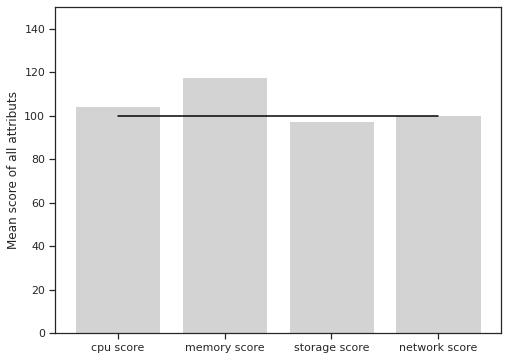

In [136]:
f, ax = plt.subplots(figsize=(8, 6))
sns.set_theme(style="ticks")
sns.barplot(x=mean_score_metrics.columns, y=mean_score_metrics.iloc[0], color='lightgrey')
sns.lineplot(x=mean_score_metrics.columns, y=100, color='black')
ax.set(ylabel='Mean score of all attributs')
#ax.set_xticks(range(len(mean_score_metrics.columns)))
#ax.set_xticklabels(range(len(mean_score_metrics.columns)))
ax.set(ylim=(0, 150))